In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from PIL import Image

In [2]:
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

In [3]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

In [4]:
def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold, ccolor=cm, psize=10, alpha=0.1):
    ax,xx,yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=False, colorscale=colorscale, cdiscrete=cdiscrete, psize=psize, alpha=alpha, predicted=True) 
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
    cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14, axes=ax)
    return ax

In [5]:
dflog=pd.read_csv("01_heights_weights_genders.csv")
dflog.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


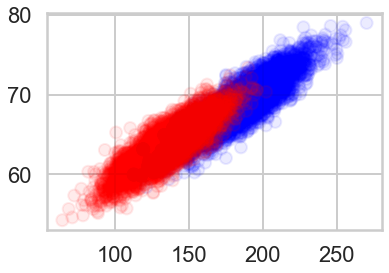

In [6]:
plt.scatter(dflog.Weight, dflog.Height, c=[cm_bright.colors[i] for i in dflog.Gender=="Male"], alpha=0.08);

In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    fold = KFold(nfold, shuffle = False)
    for train, test in fold.split(y): 
        clf.fit(x[train], y[train]) 
        result += score_func(clf.predict(x[test]), y[test]) 
    return result / nfold

In [13]:

from sklearn.model_selection import train_test_split
Xlr, Xtestlr, ylr, ytestlr = train_test_split(dflog[['Height','Weight']].values, (dflog.Gender=="Male").values)

In [14]:
Cs = [0.001, 0.1, 1, 10, 100]
from sklearn.linear_model import LogisticRegression
max_score = 0
for C in Cs:
        clf = LogisticRegression(C=C)
        score = cv_score(clf, Xlr, ylr)

        if score > max_score:
            max_score = score
            best_C =C
print(max_score, best_C)

c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gmin\appdata\local\programs\python\python36

0.9210666666666667 0.001


c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gmin\appdata\local\programs\python\python36

In [18]:
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import  GridSearchCV
clfl2=LogisticRegression()
parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}
fitmodel = GridSearchCV(clfl2, param_grid=parameters, cv=5, scoring="accuracy")
fitmodel.fit(Xlr, ylr)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gmin\appdata\local\programs\python\python36

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [19]:
clfl2=LogisticRegression(C=fitmodel.best_params_['C'])
clfl2.fit(Xlr, ylr)
ypred2=clfl2.predict(Xtestlr)
accuracy_score(ypred2, ytestlr)

c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9136

In [24]:
data=np.load("imag.pix.npy")
y=np.load("imag.lbl.npy")
STANDARD_SIZE = (322, 137)
data.shape, y.shape

((87, 132342), (87,))

In [25]:
def get_image(mat):
    size = STANDARD_SIZE[0]*STANDARD_SIZE[1]*3
    r,g,b = mat[0:size:3], mat[1:size:3],mat[2:size:3]
    rgbArray = np.zeros((STANDARD_SIZE[1],STANDARD_SIZE[0], 3), 'uint8')#3 channels
    rgbArray[..., 0] = r.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 1] = b.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 2] = g.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    return rgbArray

def display_image(mat):
    with sns.axes_style("white"):
        plt.imshow(get_image(mat))
        plt.xticks([])
        plt.yticks([])

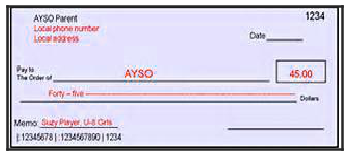

In [26]:
display_image(data[5])

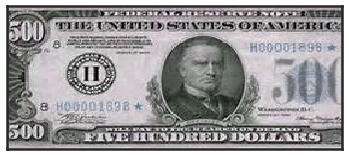

In [27]:
display_image(data[50])

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=60)
X = pca.fit_transform(data)

In [30]:
print(pca.explained_variance_ratio_.sum())

0.9426070724888084


In [31]:
pca.explained_variance_ratio_*100

array([35.92596698,  6.29318801,  4.10778347,  3.11950952,  2.81695972,
        2.28831619,  2.10127948,  1.87404974,  1.73264633,  1.53023764,
        1.42159641,  1.31839367,  1.24701527,  1.16381783,  1.09958253,
        1.06073092,  1.00742959,  0.98023776,  0.96055696,  0.91535519,
        0.90185371,  0.85213019,  0.8367333 ,  0.79692075,  0.75488851,
        0.72504499,  0.70820351,  0.67962795,  0.66090861,  0.64768044,
        0.62735245,  0.59459509,  0.58295755,  0.57431017,  0.57272758,
        0.55232425,  0.53847848,  0.53329354,  0.51637793,  0.49312288,
        0.48574088,  0.47725735,  0.47251868,  0.45578409,  0.44373557,
        0.43932339,  0.4333894 ,  0.42777204,  0.42158511,  0.40904798,
        0.40374221,  0.39383168,  0.38583186,  0.38228503,  0.3785463 ,
        0.36257936,  0.3575956 ,  0.34829628,  0.3346345 ,  0.33302485])

In [32]:
df = pd.DataFrame({"y":y, "label":np.where(y==1, "check", "dollar")})
for i in range(pca.explained_variance_ratio_.shape[0]):
    df["pc%i" % (i+1)] = X[:,i]
df.head()

,y,label,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40,pc41,pc42,pc43,pc44,pc45,pc46,pc47,pc48,pc49,pc50,pc51,pc52,pc53,pc54,pc55,pc56,pc57,pc58,pc59,pc60
0,1,check,-22536.362571,-2428.343726,-2133.775503,-328.311071,-1065.231534,79.769848,-425.023857,622.549422,-2490.185969,-858.446035,-1072.346584,276.690547,-1116.743129,712.851277,-787.237817,414.992039,-196.265357,471.398624,-428.569607,-610.105426,-590.249042,-267.453586,-984.729244,955.396831,1038.489718,567.740303,-38.927594,-110.778581,-517.811664,552.493865,-653.275384,64.345886,-729.067802,1273.370228,-544.407852,-115.541378,503.659858,305.496092,-256.378127,20.451246,-468.831612,753.641549,483.593428,-464.946193,490.977325,231.707215,138.636839,273.803013,587.747349,-465.093245,-594.927931,231.355963,374.321478,-269.155774,-210.118898,-502.517336,17.977646,-47.693088,400.606078,148.317835
1,1,check,-22226.658684,-709.255645,-288.826569,-1300.631008,-792.074616,217.449992,1076.774112,-2115.045806,-875.421351,-1124.785709,-343.014536,-43.560713,548.014659,357.456004,-1760.743035,-372.396115,812.782281,293.397261,-940.496364,154.693423,-1124.816363,507.952558,-816.770984,717.723833,290.984981,-118.453766,818.824748,1144.098585,-356.979634,125.026107,-857.494603,567.448894,316.810706,190.213419,-668.355499,-659.768320,-88.791383,-187.404764,-146.240395,-379.002299,122.771128,30.814220,681.326163,-7.973028,297.098620,-28.780921,49.989203,269.783029,-1153.011133,290.531716,-424.428744,-65.463955,282.038482,235.112332,586.675839,-455.812824,62.742934,29.702997,89.870415,255.968747
2,1,check,-17364.260784,-4252.027496,793.800354,-1362.056685,-374.221027,3142.115956,2514.207809,1443.847352,-120.884015,-419.762771,-2083.338684,1718.208885,-723.017018,-1240.425324,-309.234690,-1058.458029,1386.758144,-799.584062,-2600.012964,-879.616131,3382.038932,-387.524289,-3419.279494,1336.806399,-4754.536090,1039.961075,2196.695062,-691.218620,1381.997587,-2160.640392,-624.167974,1680.373976,1797.454780,-3076.987235,-981.359899,2231.579959,-3103.723059,3023.617183,800.687578,362.001447,1713.425228,-3021.461179,3794.598058,1655.085604,880.016581,-671.983800,344.382296,-1347.389623,175.585779,-2432.725562,-2807.217942,-1569.390325,1106.087216,-1983.134350,-1035.768111,-2432.520484,-541.657755,-410.297912,1938.268590,-763.698146
3,1,check,-22847.256199,-900.591052,577.200271,-180.318717,-733.181670,-107.906386,1441.977947,-1069.826336,844.076048,-1390.379404,1470.583226,-724.340047,-579.468827,-261.865686,931.914356,171.928745,-303.057841,869.786896,-180.670390,1235.492098,562.774208,-181.482059,-319.804524,-362.224604,-930.333527,192.977625,1312.090923,119.955712,-257.881541,-467.636411,-166.661364,-44.929642,101.214520,827.429972,-128.594298,641.379200,379.814313,426.175294,92.966575,-437.268945,1433.339457,-907.448518,-1053.004782,495.094102,476.563101,420.609240,539.301655,-230.870375,882.440062,-1902.917593,-311.922653,191.281130,-694.195287,-297.378200,-299.572737,437.413365,832.126327,-410.538002,-280.906505,-216.791048
4,1,check,-15868.672595,3259.490432,506.799094,-919.662234,2166.550793,-981.628461,-1669.669746,-391.510184,1735.442583,163.419968,-1628.408235,-555.257517,-863.073592,1721.146551,946.310542,-1134.506837,2141.410782,767.133825,-1095.421368,599.904968,-27.475056,81.708252,-510.013282,1102.263326,323.580063,-1227.090627,-723.183985,-734.747467,-148.076157,-941.989150,1042.749537,-3546.784977,2123.791141,-3284.097849,-1086.410877,-2167.182417,1835.173682,2124.006739,2595.418248,-518.103220,179.140970,1375.096806,1368.217194,-1192.701896,-254.809527,980.946892,-411.986400,858.041745,-3239.002070,1510.718835,-956.862897,-2099.844840,-146.520071,-12.912747,3636.985516,2826.541342,-161.106202,-1694.808366,1706.587656,1740.527302


In [33]:
def normit(a):
    a=(a - a.min())/(a.max() -a.min())
    a=a*256
    return np.round(a)
def getNC(pc, j):
    size=322*137*3
    r=pc.components_[j][0:size:3]
    g=pc.components_[j][1:size:3]
    b=pc.components_[j][2:size:3]
    r=normit(r)
    g=normit(g)
    b=normit(b)
    return r,g,b
def display_component(pc, j):
    r,g,b = getNC(pc,j)
    rgbArray = np.zeros((137,322,3), 'uint8')
    rgbArray[..., 0] = r.reshape(137,322)
    rgbArray[..., 1] = g.reshape(137,322)
    rgbArray[..., 2] = b.reshape(137,322)
    plt.imshow(rgbArray)
    plt.xticks([])
    plt.yticks([])

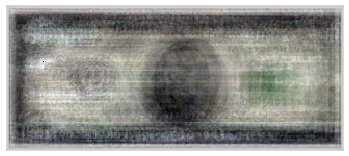

In [34]:
display_component(pca,0)

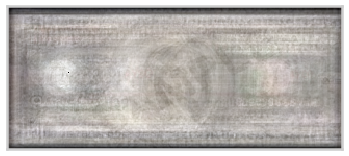

In [35]:
display_component(pca,1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


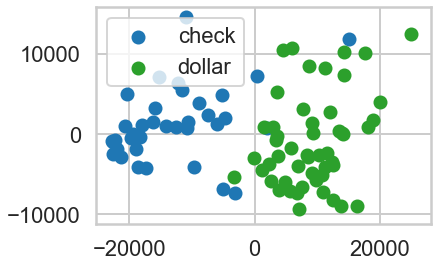

In [36]:
colors = [c0, c2]
for label, color in zip(df['label'].unique(), colors):
    mask = df['label']==label
    plt.scatter(df[mask]['pc1'], df[mask]['pc2'], c=color, label=label)
plt.legend()

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
ys=df['y'].astype(int).values
subdf=df[['pc1','pc2']]
subdfstd=(subdf - subdf.mean())/subdf.std()
Xs=subdfstd.values
def classify(X,y, nbrs, plotit=True, train_size=0.6):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf= KNeighborsClassifier(nbrs)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    Xall=np.concatenate((Xtrain, Xtest))
    if plotit:
        print("Accuracy on training data: %0.2f" % (training_accuracy))
        print("Accuracy on test data:     %0.2f" % (test_accuracy))
        plt.figure()
        ax=plt.gca()
        points_plot(ax, Xtrain, Xtest, ytrain, ytest, clf, alpha=0.3, psize=20)
    return nbrs, training_accuracy, test_accuracy

Accuracy on training data: 1.00
Accuracy on test data:     1.00


(1, 1.0, 1.0)

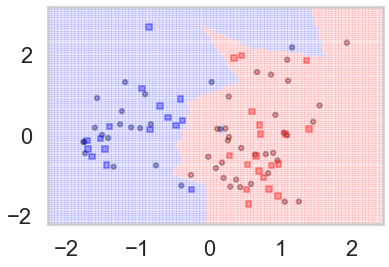

In [40]:
classify(Xs,ys,1)

Accuracy on training data: 0.60
Accuracy on test data:     0.57


(50, 0.5961538461538461, 0.5714285714285714)

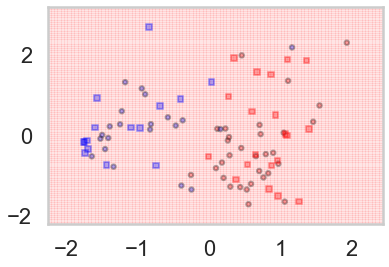

In [41]:
classify(Xs,ys,50)

In [42]:
fits={}
for k in np.arange(1,45,1):
    fits[k]=[]
    for i in range(200):
        fits[k].append(classify(Xs, ys,k, False))
nbrs=np.arange(1,45,1)
fmeanstr = np.array([1.-np.mean([t[1] for t in fits[e]]) for e in nbrs])
fmeanste = np.array([1.-np.mean([t[2] for t in fits[e]]) for e in nbrs])
fstdsstr = np.array([np.std([t[1] for t in fits[e]]) for e in nbrs])
fstdsste = np.array([np.std([t[2] for t in fits[e]]) for e in nbrs])

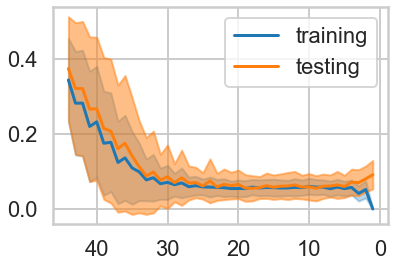

In [43]:
plt.gca().invert_xaxis()
plt.plot(nbrs, fmeanstr, color=c0, label="training");
plt.fill_between(nbrs, fmeanstr - fstdsstr, fmeanstr+fstdsstr, color=c0, alpha=0.3)
plt.plot(nbrs, fmeanste, color=c1, label="testing");
plt.fill_between(nbrs, fmeanste - fstdsste, fmeanste+fstdsste, color=c1, alpha=0.5)
plt.legend();

In [45]:
def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=5):
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(Xtrain, ytrain)
    print("BEST PARAMS", gs.best_params_)
    best = gs.best_estimator_
    return best

In [47]:
from sklearn.model_selection import train_test_split
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, standardize=False, train_size=0.8):
    subdf=indf[featurenames]
    if standardize:
        subdfstd=(subdf - subdf.mean())/subdf.std()
    else:
        subdfstd=subdf
    X=subdfstd.values
    y=(indf[targetname].values==target1val)*1
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf = cv_optimize(clf, parameters, Xtrain, ytrain)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print("Accuracy on training data: %0.2f" % (training_accuracy))
    print("Accuracy on test data:     %0.2f" % (test_accuracy))
    return clf, Xtrain, ytrain, Xtest, ytest

In [48]:
bestcv, Xtrain, ytrain, Xtest, ytest = do_classify(KNeighborsClassifier(), {"n_neighbors": range(1,40,2)}, df, ['pc1','pc2'], 'label', 'check' )

BEST PARAMS {'n_neighbors': 3}
Accuracy on training data: 0.96
Accuracy on test data:     0.94


c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  " results when test-set sizes are unequal.",


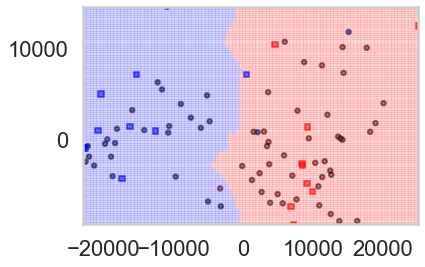

In [49]:
plt.figure()
ax=plt.gca()
points_plot(ax, Xtrain, Xtest, ytrain, ytest, bestcv, alpha=0.5, psize=20);

c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'axes'
  """
c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'axes'
  


TypeError: clabel() got an unexpected keyword argument 'axes'

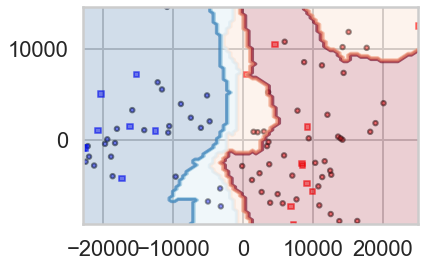

In [50]:
plt.figure()
ax=plt.gca()
points_plot_prob(ax, Xtrain, Xtest, ytrain, ytest, bestcv, alpha=0.5, psize=20);

In [51]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(ytest, bestcv.predict(Xtest), )

array([[9, 0],
       [1, 8]], dtype=int64)

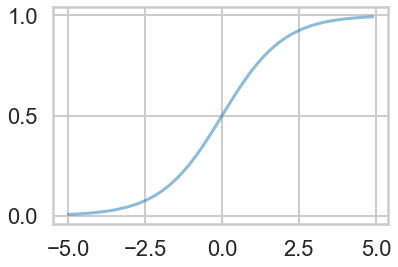

In [52]:
h = lambda z: 1./(1+np.exp(-z))
zs=np.arange(-5,5,0.1)
plt.plot(zs, h(zs), alpha=0.5);

In [53]:
dflog.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [54]:
clf_l, Xtrain_l, ytrain_l, Xtest_l, ytest_l  = do_classify(LogisticRegression(), {"C": [0.01, 0.1, 1, 10, 100]}, dflog, ['Weight', 'Height'], 'Gender','Male')

c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gmin\appdata\local\programs\python\python36

BEST PARAMS {'C': 0.01}
Accuracy on training data: 0.92
Accuracy on test data:     0.92


c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gmin\appdata\local\programs\python\python36

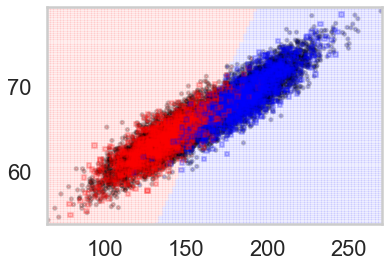

In [55]:
plt.figure()
ax=plt.gca()
points_plot(ax, Xtrain_l, Xtest_l, ytrain_l, ytest_l, clf_l, alpha=0.2);

In [56]:
clf_l.predict_proba(Xtest_l)

array([[3.21670514e-01, 6.78329486e-01],
       [4.84991691e-02, 9.51500831e-01],
       [7.64155249e-01, 2.35844751e-01],
       ...,
       [1.67690340e-01, 8.32309660e-01],
       [1.76105504e-04, 9.99823894e-01],
       [4.96969864e-01, 5.03030136e-01]])

c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'axes'
  """
c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'axes'
  


TypeError: clabel() got an unexpected keyword argument 'axes'

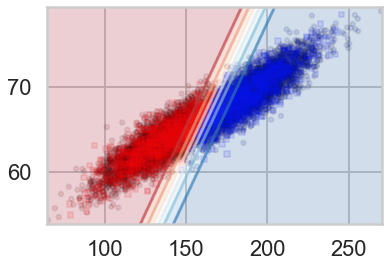

In [57]:
plt.figure()
ax=plt.gca()
points_plot_prob(ax, Xtrain_l, Xtest_l, ytrain_l, ytest_l, clf_l, psize=20, alpha=0.1);